In [66]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [67]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
driver = webdriver.Chrome()

url = "https://www.mois.go.kr/frt/sub/a02/farmProductPriceList/screen.do"
driver.get(url)
time.sleep(2)
soup = BeautifulSoup(response.text, 'lxml')

item_headers = soup.select('.top th')[1:]
items = [header.text.strip() for header in item_headers]

headers = soup.select('.head')
regions = [header.text.strip() for header in headers]

data = []
rows = soup.select('tr.first')
for row in rows:
    cells = row.select('td')
    row_data = [cell.text.replace(',', '').strip() for cell in cells]
    data.append(row_data)

df = pd.DataFrame(data, columns=items, index=regions)

# 문자열 - 실수형
def to_float(x):
    try:
        return float(x)
    except ValueError:
        return 0

df = df.applymap(to_float)
print(df)

# 서울의 쇠고기 가격 차이에 대한 그래프
seoul_beef_prices = df.loc['서울']['쇠고기']
plt.plot(seoul_beef_prices, marker='o')
plt.title('서울의 쇠고기 가격 변화')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 서울의 각 음식별 가격에 대한 그래프
seoul_food_prices = df.loc['서울']
seoul_food_prices.drop('쇠고기', axis=1, inplace=True)
seoul_food_prices = seoul_food_prices.transpose()
seoul_food_prices.plot(marker='o')
plt.title('서울의 각 음식별 가격 변화')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='음식')
plt.show()

NameError: name 'response' is not defined

In [70]:
# 강사님 코드
url = "https://www.mois.go.kr/frt/sub/a02/farmProductPriceList/screen.do"
driver = webdriver.Chrome()
driver.get(url)

iframe = driver.find_element(By.CSS_SELECTOR, 'iframe')
driver.switch_to.frame(iframe) # 화면 옮기기

head_lst = []
html = driver.find_elements(By.CSS_SELECTOR, 'div.tableBox01 thead th')
for th in html :
    head_lst.append(th.text)

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

body_lst = []
index_lst = []
t_body = soup.select('div.tableBox01 tbody tr.first')

for body in t_body:
    td = body.select('td:not(.head)') # 단어 부분을 인식하지 못하므로 :not(.head)를 작성한다.
    index = body.select_one('td.head') # index 부분에 따로 head 부분을 불러와준다.
    index_lst.append(index.text)
    sub_body = []
    for d in td:
        if d.text.strip() == '-' :
            break
        sub_body.append(int(d.text.strip().replace(',', '')))
        
    if len(sub_body) == 0:
        continue
        
    body_lst.append(sub_body)

print(head_lst)
print(body_lst)
print(index_lst)

['구분', '쇠고기', '돼지고기', '닭고기', '달걀', '배추', '무', '감자', '고추가루', '콩', '쌀']
[[13073, 2551, 8679, 3674, 6095, 2294, 6622, 5081, 12716, 54982], [11179, 2691, 7896, 3648, 4832, 1785, 6199, 4631, 10843, 55914], [9963, 2377, 8394, 3003, 5525, 1757, 5644, 3598, 10397, 55583], [11926, 2837, 7923, 3242, 5780, 1535, 6020, 4638, 11728, 55344], [13377, 3058, 7965, 3347, 4940, 1797, 6685, 4162, 10252, 55320], [10869, 2269, 8165, 3523, 6751, 1675, 5651, 5021, 11052, 53513], [11799, 2543, 8005, 3685, 5887, 2085, 6221, 5525, 10086, 55247], [10467, 2423, 7757, 3439, 5681, 1947, 5944, 4595, 12491, 61430], [10784, 2658, 7919, 3126, 6658, 1929, 6101, 4098, 10606, 58530], [10151, 2606, 8086, 3578, 4570, 2028, 5960, 4035, 13297, 56390], [10046, 2398, 8369, 3288, 5765, 2058, 5014, 4723, 10017, 52677], [12391, 2386, 7548, 3405, 5627, 1788, 5954, 3301, 8270, 49423], [12966, 2719, 7425, 3214, 5751, 2093, 6265, 3747, 10316, 59707], [9667, 2140, 7743, 3430, 6537, 2065, 5811, 4164, 12681, 54305], [10510, 2321, 7252, 39

In [71]:
head_lst = head_lst[1:]
index_lst.remove('세종')
index_lst

['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [72]:
df = pd.DataFrame(body_lst, columns = head_lst, index = index_lst)
df

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
서울,13073,2551,8679,3674,6095,2294,6622,5081,12716,54982
부산,11179,2691,7896,3648,4832,1785,6199,4631,10843,55914
대구,9963,2377,8394,3003,5525,1757,5644,3598,10397,55583
인천,11926,2837,7923,3242,5780,1535,6020,4638,11728,55344
광주,13377,3058,7965,3347,4940,1797,6685,4162,10252,55320
대전,10869,2269,8165,3523,6751,1675,5651,5021,11052,53513
울산,11799,2543,8005,3685,5887,2085,6221,5525,10086,55247
경기,10467,2423,7757,3439,5681,1947,5944,4595,12491,61430
강원,10784,2658,7919,3126,6658,1929,6101,4098,10606,58530
충북,10151,2606,8086,3578,4570,2028,5960,4035,13297,56390


In [73]:
# 각 지역별 가격 평균을 구하여 비교
df.mean()

쇠고기     11263.5000
돼지고기     2528.0000
닭고기      7923.1875
달걀       3446.6250
배추       5737.1875
무        1888.3750
감자       5933.9375
고추가루     4302.5000
콩       10987.2500
쌀       55262.1250
dtype: float64

In [74]:
df.T.mean()

서울    11576.7
부산    10961.8
대구    10624.1
인천    11097.3
광주    11090.3
대전    10848.9
울산    11108.3
경기    11617.4
강원    11240.9
충북    11070.1
충남    10435.5
전북    10009.3
전남    11420.3
경북    10854.3
경남    10606.4
제주    10274.7
dtype: float64

In [75]:
df.sort_values(by=['쇠고기'])

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
경북,9667,2140,7743,3430,6537,2065,5811,4164,12681,54305
대구,9963,2377,8394,3003,5525,1757,5644,3598,10397,55583
충남,10046,2398,8369,3288,5765,2058,5014,4723,10017,52677
충북,10151,2606,8086,3578,4570,2028,5960,4035,13297,56390
경기,10467,2423,7757,3439,5681,1947,5944,4595,12491,61430
경남,10510,2321,7252,3946,6018,1926,5625,3694,9593,55179
강원,10784,2658,7919,3126,6658,1929,6101,4098,10606,58530
대전,10869,2269,8165,3523,6751,1675,5651,5021,11052,53513
제주,11048,2471,7645,3598,5378,1452,5227,3827,11451,50650
부산,11179,2691,7896,3648,4832,1785,6199,4631,10843,55914


In [76]:
df.T.mean().sort_values(ascending=False)

경기    11617.4
서울    11576.7
전남    11420.3
강원    11240.9
울산    11108.3
인천    11097.3
광주    11090.3
충북    11070.1
부산    10961.8
경북    10854.3
대전    10848.9
대구    10624.1
경남    10606.4
충남    10435.5
제주    10274.7
전북    10009.3
dtype: float64

In [77]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')

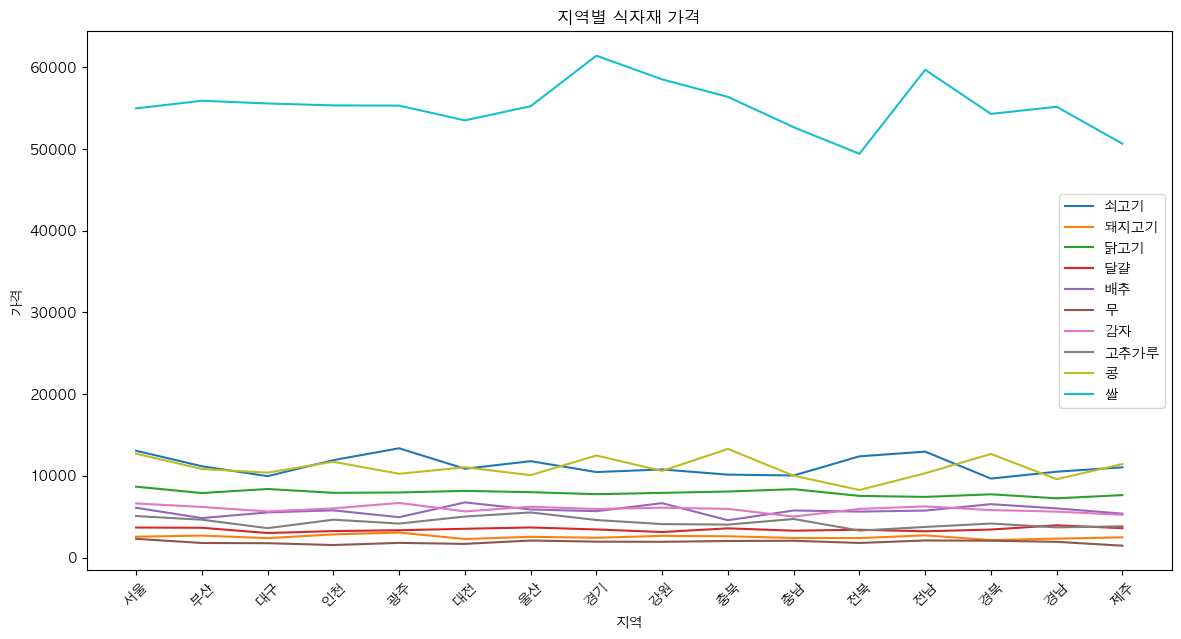

In [78]:
plt.figure(figsize=(14, 7)) # 그래프 크기 조절

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('지역별 식자재 가격')
plt.xlabel('지역')
plt.ylabel('가격')

plt.legend(loc='center right')
plt.xticks(rotation=45) # 지역 글씨 휘도록 설정

plt.show()

In [83]:
# 과제2 ) 작년 데이터 들고 와서 비교
from selenium.webdriver.support.ui import Select

url = "https://www.mois.go.kr/frt/sub/a02/farmProductPriceList/screen.do"
driver = webdriver.Chrome()
driver.get(url)

time.sleep(3)

iframe = driver.find_element(By.CSS_SELECTOR, 'iframe')
driver.switch_to.frame(iframe) # 화면 옮기기

dropdown = driver.find_element(By. ID, 'year')
# dropdown.click()
# option = driver.find_element(By. XPATH, "//option[text()='2023']")
# option.click
select = Select(dropdown)
select.select_by_visible_text('2023')
search = driver.find_element(By. ID,'srch')
search.click()

head_lst2 = []
html = driver.find_elements(By.CSS_SELECTOR, 'div.tableBox01 thead th')
for th in html :
    head_lst2.append(th.text)

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

body_lst2 = []
index_lst2 = []
t_body = soup.select('div.tableBox01 tbody tr.first')

for body in t_body:
    td = body.select('td:not(.head)') # 단어 부분을 인식하지 못하므로 :not(.head)를 작성한다.
    index = body.select_one('td.head') # index 부분에 따로 head 부분을 불러와준다.
    index_lst2.append(index.text)
    sub_body2 = []
    for d in td:
        if d.text.strip() == '-' :
            break
        sub_body2.append(int(d.text.strip().replace(',', '')))
        
    if len(sub_body2) == 0:
        continue
        
    body_lst2.append(sub_body2)

print(head_lst2)
print(body_lst2)
print(index_lst2)

['구분', '쇠고기', '돼지고기', '닭고기', '달걀', '배추', '무', '감자', '고추가루', '콩', '쌀']
[[13073, 2551, 8679, 3674, 6095, 2294, 6622, 5081, 12716, 54982], [11179, 2691, 7896, 3648, 4832, 1785, 6199, 4631, 10843, 55914], [9963, 2377, 8394, 3003, 5525, 1757, 5644, 3598, 10397, 55583], [11926, 2837, 7923, 3242, 5780, 1535, 6020, 4638, 11728, 55344], [13377, 3058, 7965, 3347, 4940, 1797, 6685, 4162, 10252, 55320], [10869, 2269, 8165, 3523, 6751, 1675, 5651, 5021, 11052, 53513], [11799, 2543, 8005, 3685, 5887, 2085, 6221, 5525, 10086, 55247], [10467, 2423, 7757, 3439, 5681, 1947, 5944, 4595, 12491, 61430], [10784, 2658, 7919, 3126, 6658, 1929, 6101, 4098, 10606, 58530], [10151, 2606, 8086, 3578, 4570, 2028, 5960, 4035, 13297, 56390], [10046, 2398, 8369, 3288, 5765, 2058, 5014, 4723, 10017, 52677], [12391, 2386, 7548, 3405, 5627, 1788, 5954, 3301, 8270, 49423], [12966, 2719, 7425, 3214, 5751, 2093, 6265, 3747, 10316, 59707], [9667, 2140, 7743, 3430, 6537, 2065, 5811, 4164, 12681, 54305], [10510, 2321, 7252, 39

In [84]:
head_lst2 = head_lst2[1:]
index_lst2.remove('세종')

In [85]:
df2 = pd.DataFrame(body_lst2, columns=head_lst2, index=index_lst2)
df2

,쇠고기,돼지고기,닭고기,달걀,배추,무,감자,고추가루,콩,쌀
서울,13073,2551,8679,3674,6095,2294,6622,5081,12716,54982
부산,11179,2691,7896,3648,4832,1785,6199,4631,10843,55914
대구,9963,2377,8394,3003,5525,1757,5644,3598,10397,55583
인천,11926,2837,7923,3242,5780,1535,6020,4638,11728,55344
광주,13377,3058,7965,3347,4940,1797,6685,4162,10252,55320
대전,10869,2269,8165,3523,6751,1675,5651,5021,11052,53513
울산,11799,2543,8005,3685,5887,2085,6221,5525,10086,55247
경기,10467,2423,7757,3439,5681,1947,5944,4595,12491,61430
강원,10784,2658,7919,3126,6658,1929,6101,4098,10606,58530
충북,10151,2606,8086,3578,4570,2028,5960,4035,13297,56390


In [87]:
rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

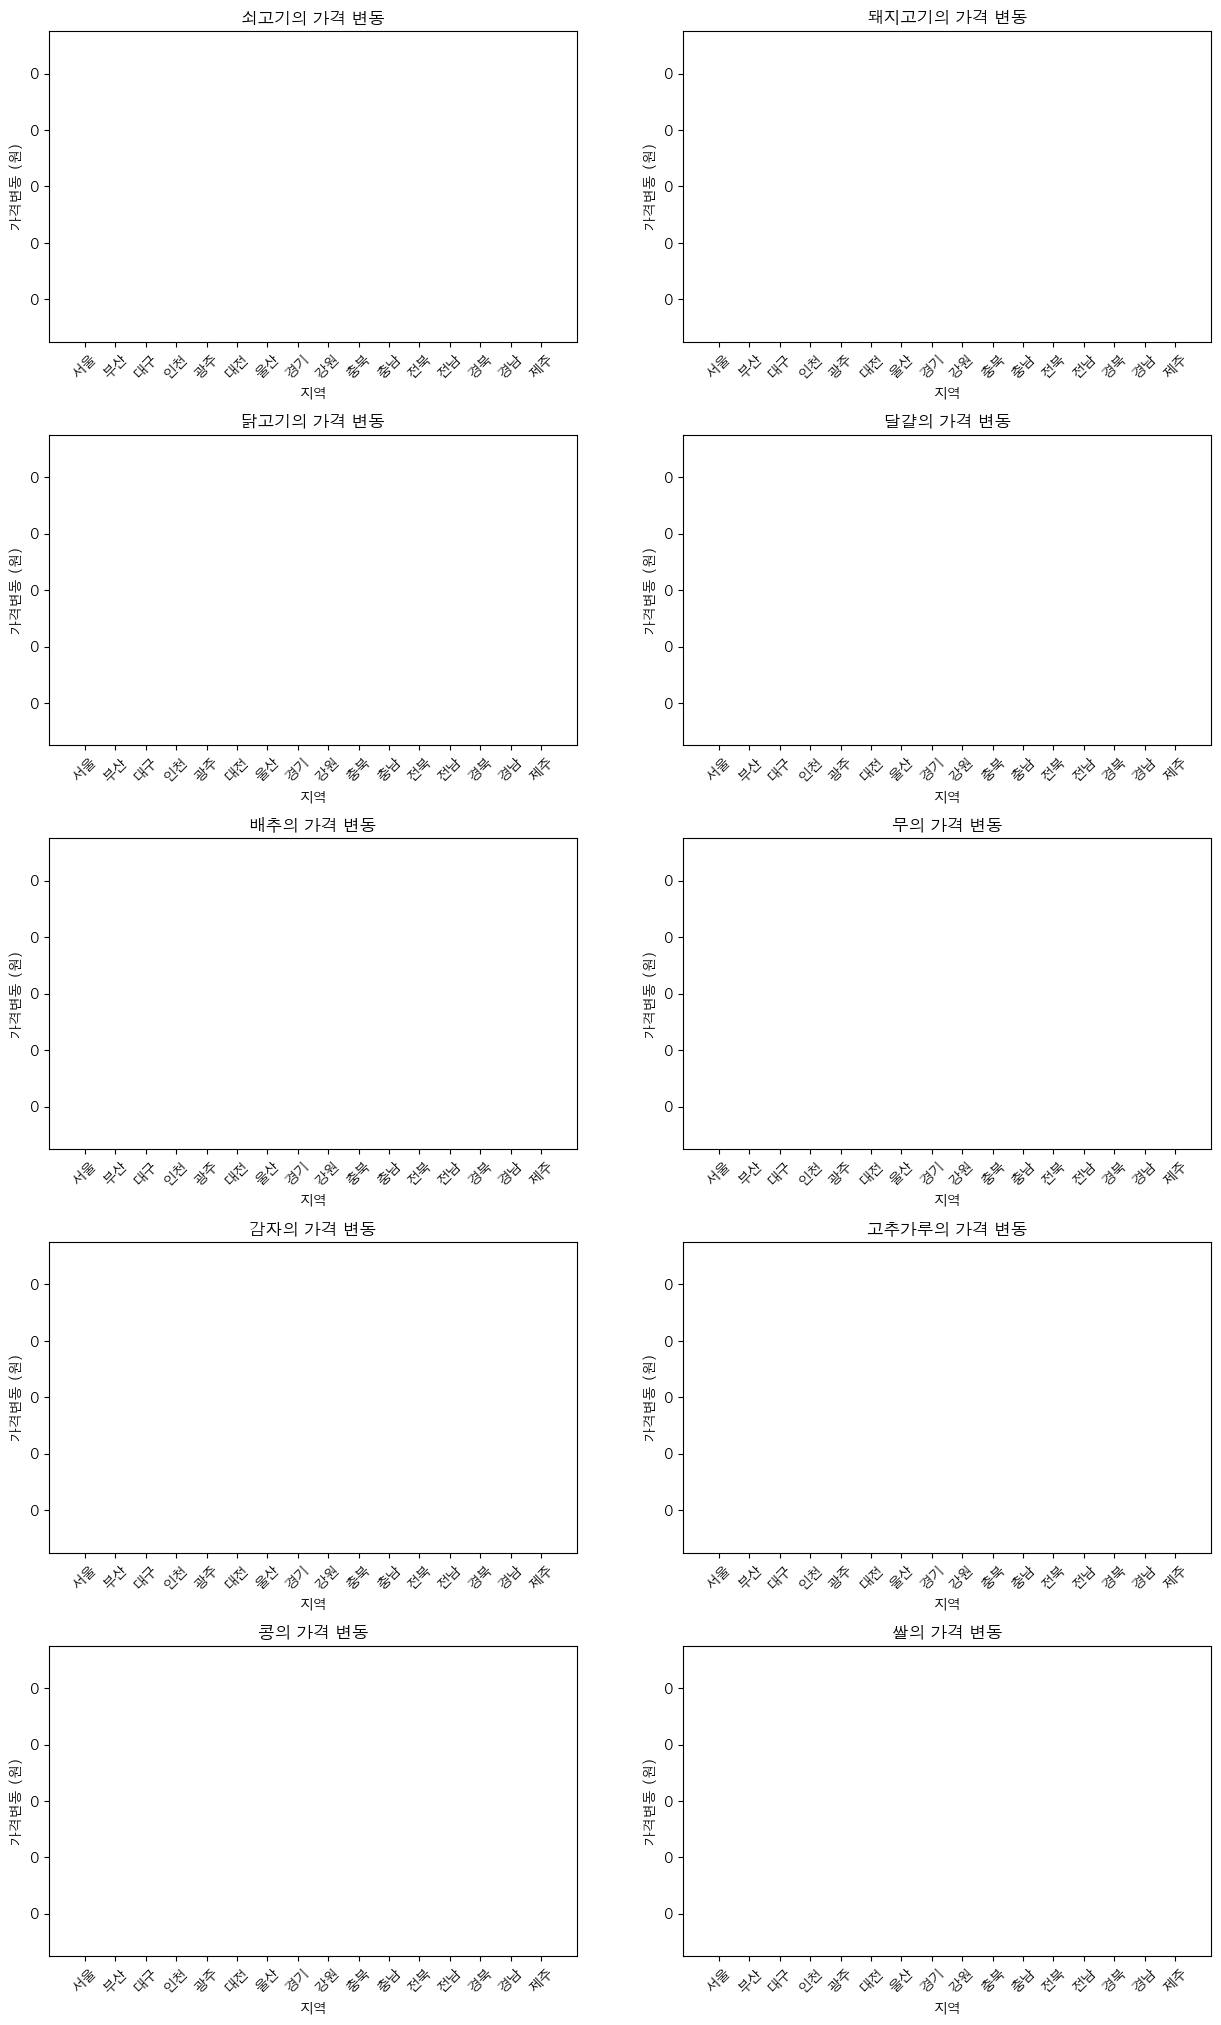

In [100]:
import matplotlib.ticker as ticker

diff = df - df2

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten() # 1차원으로 바꾸어 주는 형태(리스트를 변환)

for i, col in enumerate(head_lst):
    ax = axes[i]
    ax.bar(diff.index, diff[col])
    ax.set_title(f'{col}의 가격 변동')
    ax.set_xlabel('지역')
    ax.set_ylabel('가격변동 (원)')
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'{int(x):,}'))
    # y축에 ','를 추가하는 코드(단위마다 = Formatter에 지정되어 있는 형식)

plt.subplots_adjust(hspace=0.3)
plt.show()